In [72]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA


In [73]:
# Load clean data set
clean_data= pd.read_csv("/Users/sa20/Desktop/Music-Recommendation-Lab/Data/processed/clean_data.csv")
clean_data.head()

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.0
1,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.0
2,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.0
3,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.0
4,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.0


## K-Means Clustering w/ No Scaling

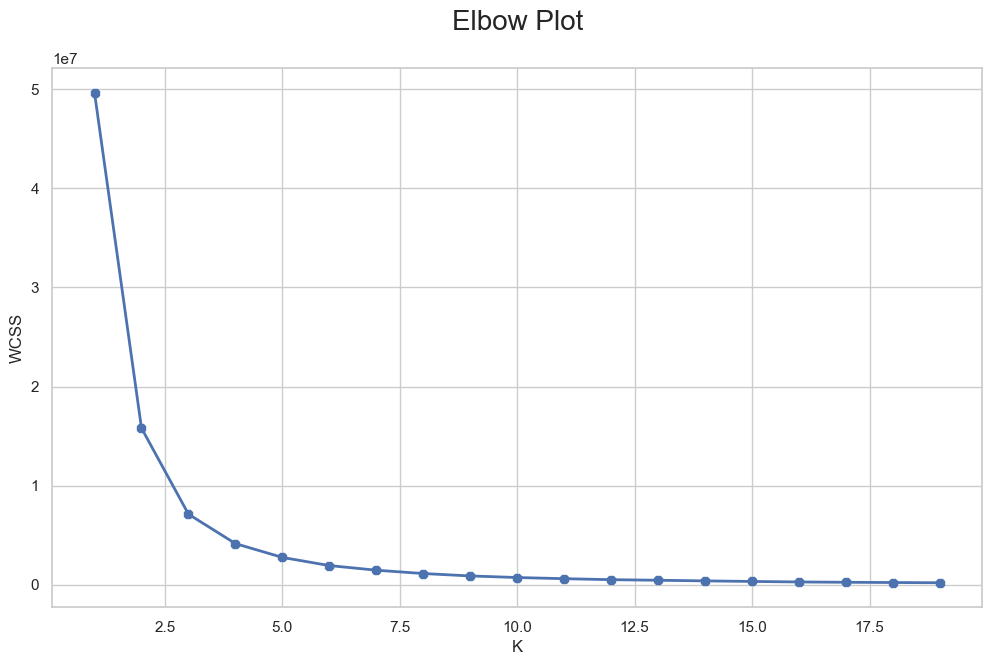

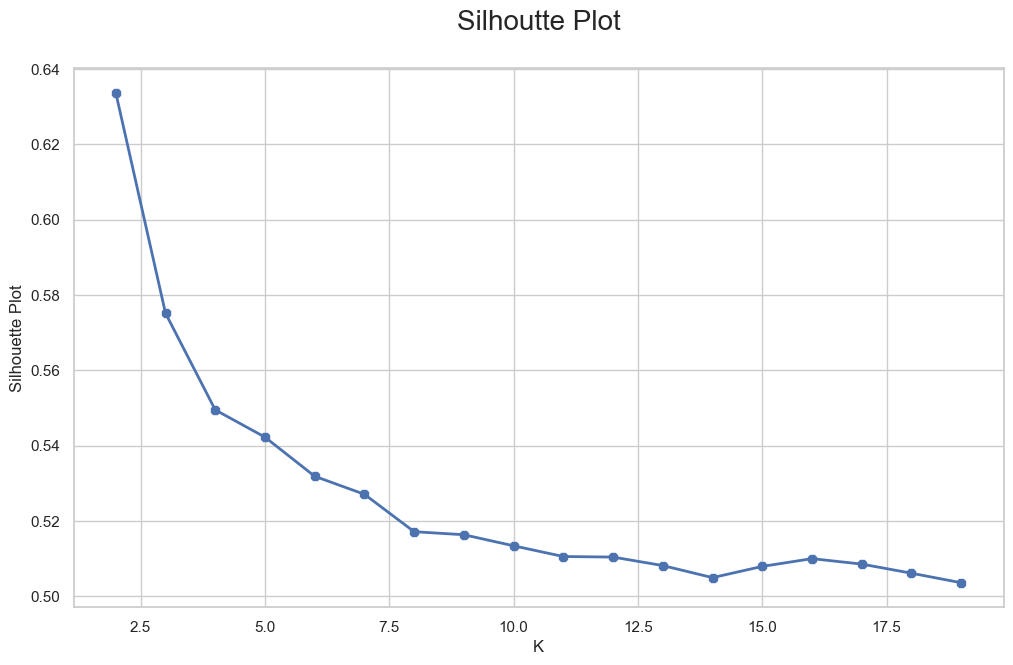

In [74]:
# Create an Elbow Plot of WCSS (within-cluster-sum-of-squares)


X1 = clean_data.loc[:, ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 
                'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions',
                 'family/spiritual', 'sadness', 'feelings', 'age' ]].values

wcss= []
for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)


plt.figure(figsize = (12, 7))


sns.set(style='whitegrid') # to show gridlines
plt.plot(range(1, 20), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()



# Create a Silhoutte Plot
silhouette = []
for k in range(2, 20):

    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=42)
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))


plt.figure(figsize = (12, 7))

plt.plot(range(2, 20), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Plot')
plt.show()

In [75]:
# Make a Kmeans model to identify 4 unique clusters in the dataset
kmeans =  KMeans(n_clusters= 4, random_state= 42)


# Fit the KMeans model to 'X1' 
kmeans.fit(X1)


# Initializes a KMeans model with 4 clusters using k-means++ initialization and a fixed random seed for reproducibility.
kmeans = KMeans(n_clusters=4, random_state=42)

In [76]:
labels= kmeans.fit_predict(X1)
labels

array([1, 3, 0, ..., 3, 3, 3], dtype=int32)

In [77]:
# Output of Centroids
kmeans.cluster_centers_

array([[3.42498444e+01, 2.13486962e-02, 9.46779985e-02, 1.41381949e-01,
        6.08756628e-02, 1.35034956e-02, 1.61291964e-02, 7.29629019e-02,
        8.24924532e-02, 4.17101657e-02, 7.06303433e-02, 3.14654092e-02,
        5.18502819e-02, 2.40997422e-02, 1.59506742e-01, 3.31241052e-02,
        5.05462708e-01],
       [1.04206047e+02, 2.01896261e-02, 1.47306219e-01, 1.06203190e-01,
        5.53340042e-02, 2.13334378e-02, 1.80546408e-02, 3.13014058e-02,
        7.15976090e-02, 1.22020537e-01, 5.26466705e-02, 5.91141716e-02,
        4.65577274e-02, 2.53046772e-02, 1.06468872e-01, 3.08235438e-02,
        3.47800469e-01],
       [1.65010211e+02, 1.79921707e-02, 1.12080663e-01, 7.25768432e-02,
        3.71850118e-02, 2.50734452e-02, 1.63057804e-02, 1.75166285e-02,
        6.33795880e-02, 3.20473518e-01, 3.52276822e-02, 6.76516709e-02,
        3.48665731e-02, 2.29470807e-02, 4.43391233e-02, 2.47649314e-02,
        3.03841291e-01],
       [6.56051690e+01, 2.23144823e-02, 1.26459192e-01, 1.239

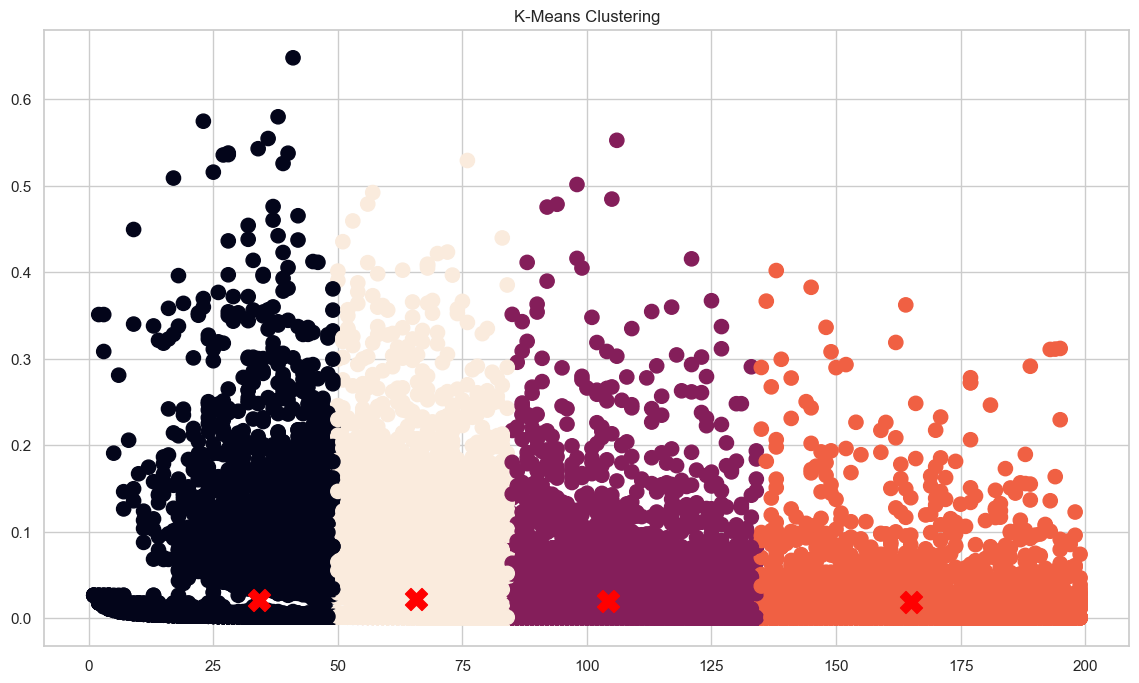

In [78]:
plt.figure(figsize=(14,8))
plt.scatter(X1 [:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color= "red", s = 250, marker='X', label="Centroids")
plt.title("K-Means Clustering")
plt.xlabel('')
plt.ylabel('')
plt.show()

## K-Means Clustering Scaled

In [79]:
# Scaler makes sure variables have equal range
scaler = StandardScaler()

# Fit Kmeans object
X1_scaled = scaler.fit_transform(X1)

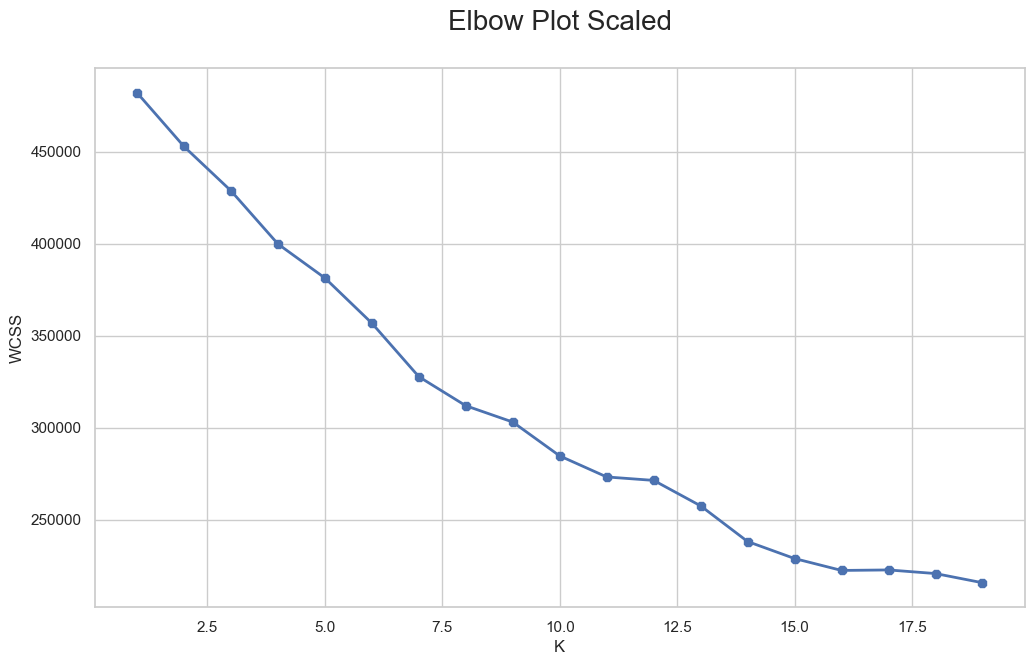

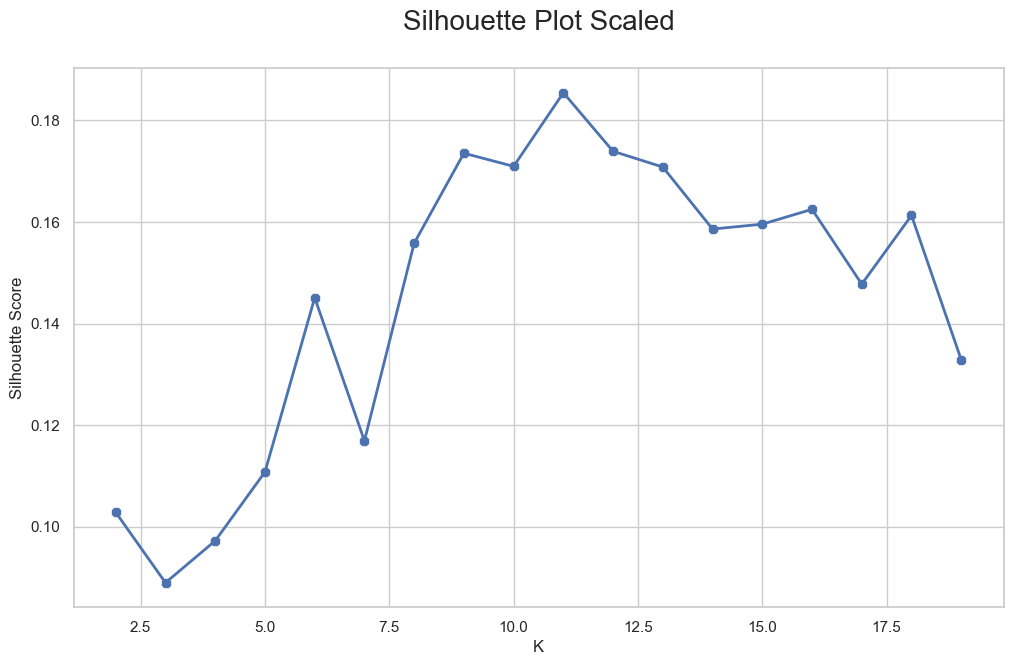

In [80]:
wcss_scaled = []

for k in range(1,20):

    kmeans = KMeans(n_clusters= k, init= "k-means++")

    kmeans.fit(X1_scaled)

    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize=(12,7))

plt.plot(range(1,20), wcss_scaled, linewidth= 2, marker ="8")
plt.title("Elbow Plot Scaled\n", fontsize= 20)
plt.xlabel('K')
plt.ylabel("WCSS")
plt.show()

# Create Silhouette Plot for Silhouette Score
silhouette_scaled = []
for k in range(2, 20):

    kmeans = KMeans(n_clusters= k, init= "k-means++")

    predictions = kmeans.fit_predict(X1_scaled)
    silhouette_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize=(12, 7))

plt.plot(range(2, 20), silhouette_scaled, linewidth= 2, marker='8')
plt.title('Silhouette Plot Scaled\n', fontsize=20)
plt.xlabel('K')
plt.ylabel("Silhouette Score")
plt.show()

In [81]:
kmeans_scaled= KMeans(n_clusters=13, init="k-means++", n_init=50, random_state=42)
kmeans_scaled.fit(X1_scaled)

KMeans(n_clusters=13, n_init=50, random_state=42)

In [82]:
labels = kmeans_scaled.fit_predict(X1_scaled)
labels

array([ 7, 10,  0, ...,  5,  5,  5], dtype=int32)

In [83]:
# Output of Centroids
kmeans_scaled.cluster_centers_

array([[-2.10526501e-01, -1.31384983e-01, -4.57557211e-01,
        -4.08359796e-01, -2.16611166e-01, -1.72851208e-01,
        -4.45843631e-02, -1.94822022e-01, -7.06969576e-02,
        -3.86201309e-01,  2.92503566e+00,  1.39958394e-01,
        -1.17018665e-02, -5.88634808e-02, -3.78299469e-01,
        -1.39406142e-01,  3.97980128e-01],
       [-2.58946432e-01, -1.85932725e-01, -4.23809354e-01,
         1.85597919e+00, -2.13922844e-01, -1.86179527e-01,
        -1.60469081e-01, -1.59946470e-01,  1.28986254e-01,
        -4.04575858e-01, -2.52538044e-01,  2.01491983e-03,
        -1.61547252e-01, -1.20635564e-01, -3.36667371e-01,
        -9.58865599e-02,  6.23809870e-02],
       [ 1.76617680e-01, -3.53502349e-02, -1.71672201e-02,
        -1.01541408e-01, -1.15905514e-01,  4.18134942e+00,
        -1.13667865e-01, -1.70171108e-01, -2.45335569e-01,
         1.79004642e-01, -1.86464501e-01, -2.04748456e-01,
        -2.52457198e-01, -1.52445878e-01, -2.25769295e-01,
        -7.50533330e-02, -2.0

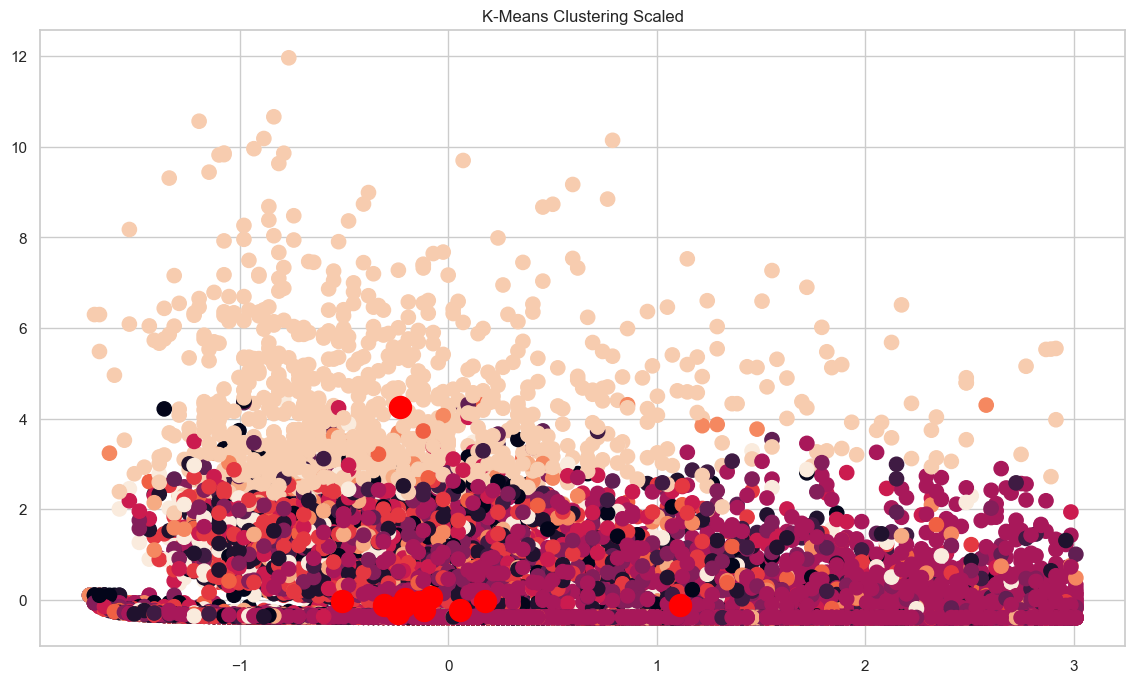

In [84]:
plt.figure(figsize=(14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s=105)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color="red", s=250)
plt.title('K-Means Clustering Scaled')
plt.xlabel('')
plt.ylabel('')
plt.show()

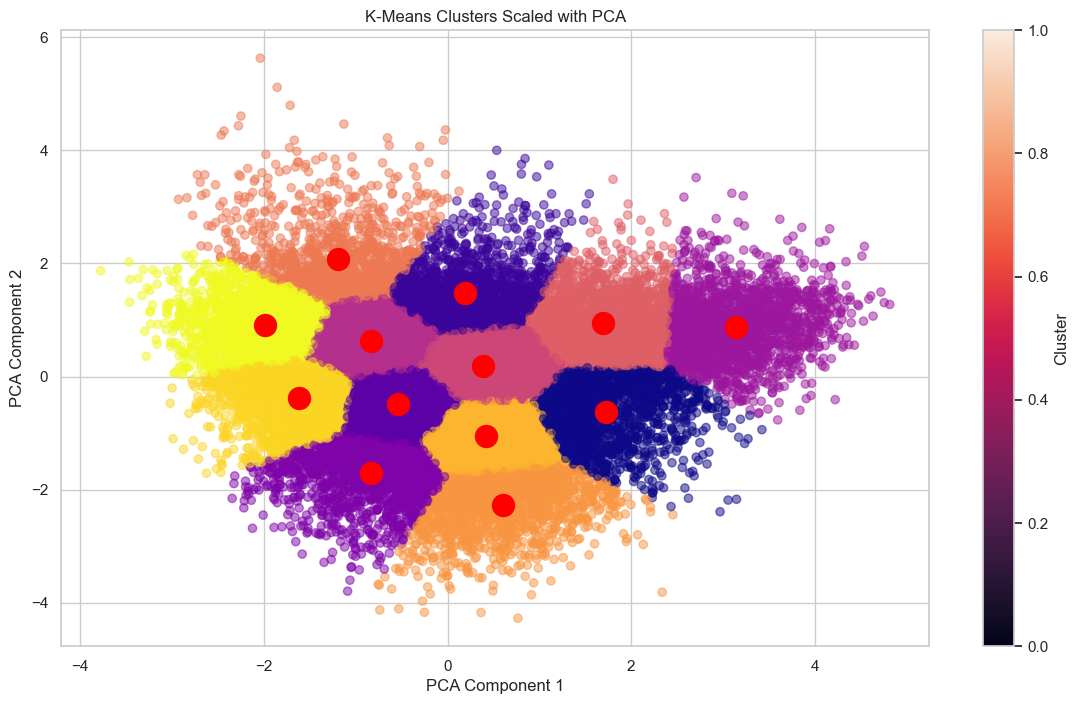

In [85]:
# Set-up PCA and Standardize data
pca = PCA(n_components=2)
x_pca= pca.fit_transform(X1_scaled)

clusters = kmeans_scaled.fit_predict(x_pca)

# Plot
plt.figure(figsize=(14, 8))

plt.scatter(x_pca[:, 0], x_pca[:, 1], c = clusters, cmap="plasma", alpha = 0.5)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color="red", s=250)
plt.title("K-Means Clusters Scaled with PCA")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

explain results

In [86]:
# Add "Cluster" column to clean dataset, use scaled data KMeans with scaled data that was visualized with PCA
clean_data['Cluster'] = kmeans_scaled.fit_predict(X1_scaled)

In [87]:
# Load the raw dataset, then add categorical columns to clean dataset
raw_data= pd.read_csv("/Users/sa20/Desktop/Music-Recommendation-Lab/Data/raw/train.csv")

label = raw_data[['genre', 'artist_name', 'track_name', 'release_date']]

label= pd.concat([label, clean_data], axis=1)

label

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,pop,mukesh,mohabbat bhi jhoothi,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.000000,7
1,pop,frankie laine,i believe,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.000000,10
2,pop,johnnie ray,cry,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.000000,0
3,pop,pérez prado,patricia,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.000000,12
4,pop,giorgos papadopoulos,apopse eida oneiro,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,hip hop,mack 10,10 million ways,2019,78,0.001350,0.001350,0.001350,0.001350,0.001350,...,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,0.014286,5
28358,hip hop,m.o.p.,ante up (robbin hoodz theory),2019,67,0.001284,0.001284,0.035338,0.001284,0.001284,...,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,0.014286,5
28359,hip hop,nine,whutcha want?,2019,77,0.001504,0.154302,0.168988,0.001504,0.039755,...,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,0.014286,5
28360,hip hop,will smith,switch,2019,67,0.001196,0.001196,0.001196,0.001196,0.048359,...,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,0.014286,5


In [88]:
# Explore value count of each cluster
clean_data['Cluster'].value_counts().sort_index().to_frame(name='Count')

,Count
Cluster,
0,2031
1,4084
2,859
3,802
4,4266
5,4111
6,1732
7,4607
8,1030


In [89]:
# Investigate clusters
label[clean_data['Cluster'] == 0].sample(10)

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
10599,country,merle haggard,he walks with me,1994,29,0.002193,0.002193,0.002193,0.002193,0.002193,...,0.369272,0.002193,0.381424,0.002193,0.002193,0.002193,0.214217,0.002193,0.371429,0
24027,rock,queen,father to son,1974,76,0.000797,0.103870,0.000797,0.057332,0.000797,...,0.000797,0.000797,0.498967,0.038518,0.000797,0.199871,0.000797,0.070276,0.657143,0
15094,blues,cab calloway,tarzan of harlem,1994,50,0.002024,0.409008,0.002024,0.002024,0.002024,...,0.002024,0.002024,0.344969,0.002024,0.002024,0.002024,0.002024,0.056506,0.371429,0
22452,reggae,frankie paul,worries in the dance,2005,110,0.001096,0.001096,0.001096,0.001096,0.001096,...,0.164715,0.001096,0.463171,0.120126,0.025113,0.068387,0.001096,0.001096,0.214286,0
13732,blues,hank ballard,tear drops on your letter,1975,51,0.001144,0.001144,0.001144,0.001144,0.001144,...,0.310401,0.001144,0.332830,0.001144,0.001144,0.001144,0.079380,0.001144,0.642857,0
4602,pop,bryan adams,when you're gone,1998,22,0.002506,0.002506,0.002506,0.002506,0.054718,...,0.284959,0.002506,0.337095,0.189922,0.002506,0.002506,0.002506,0.002506,0.314286,0
16948,blues,white denim,good news,2018,46,0.001170,0.001170,0.001170,0.260191,0.106064,...,0.105802,0.001170,0.360779,0.001170,0.045997,0.001170,0.001170,0.060854,0.028571,0
13811,blues,ella fitzgerald,one note samba,1976,46,0.091398,0.053228,0.001316,0.001316,0.001316,...,0.245863,0.001316,0.369080,0.001316,0.001316,0.051428,0.001316,0.044713,0.628571,0
6274,pop,generationals,put a light on,2013,31,0.001698,0.001698,0.001698,0.154399,0.030578,...,0.001698,0.001698,0.303252,0.118077,0.183955,0.001698,0.055912,0.001698,0.100000,0
7082,country,june carter cash,without a love to call my own,1952,31,0.002392,0.002392,0.002392,0.002392,0.002392,...,0.341708,0.002392,0.453150,0.002392,0.002392,0.002392,0.166864,0.002392,0.971429,0


In [90]:
# Cluster 1
label[clean_data['Cluster'] == 1].sample(10)

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
6379,pop,avicii,the days,2014,74,0.000822,0.023941,0.580525,0.000822,0.036192,...,0.000822,0.000822,0.000822,0.347007,0.000822,0.000822,0.000822,0.000822,0.085714,1
22318,reggae,morgan heritage,a man in love,2003,109,0.000554,0.000554,0.303362,0.054485,0.000554,...,0.241836,0.018465,0.028656,0.041586,0.000554,0.112310,0.000554,0.049711,0.242857,1
13161,blues,small faces,you better believe it,1966,103,0.017338,0.000521,0.415196,0.000521,0.000521,...,0.181373,0.208970,0.000521,0.000521,0.018657,0.000521,0.000521,0.034756,0.771429,1
25295,rock,primus,the toys go winding down,1990,50,0.001698,0.148318,0.374992,0.001698,0.001698,...,0.001698,0.001698,0.001698,0.207191,0.152410,0.001698,0.093319,0.001698,0.428571,1
6420,pop,a great big world,say something,2014,29,0.001949,0.195097,0.333147,0.001949,0.001949,...,0.281579,0.001949,0.001949,0.001949,0.001949,0.001949,0.096134,0.001949,0.085714,1
9587,country,linda ronstadt,lush life,1984,68,0.001253,0.081408,0.337821,0.001253,0.001253,...,0.097842,0.001253,0.036294,0.178339,0.001253,0.001253,0.252005,0.001253,0.514286,1
13158,blues,the paul butterfield blues band,i got a mind to give up living,1966,44,0.051230,0.300786,0.336505,0.001284,0.052138,...,0.001284,0.001284,0.161457,0.001284,0.001284,0.001284,0.001284,0.081197,0.771429,1
5656,pop,fall out boy,(coffee's for closers),2008,120,0.105265,0.061238,0.473882,0.000560,0.000560,...,0.000560,0.100679,0.000560,0.000560,0.000560,0.000560,0.082200,0.000560,0.171429,1
14029,blues,zz top,dust my broom,1979,37,0.107474,0.001698,0.305825,0.001698,0.001698,...,0.001698,0.001698,0.163647,0.180856,0.001698,0.001698,0.001698,0.158877,0.585714,1
9846,country,randy travis,reasons i cheat,1986,71,0.001053,0.102955,0.463884,0.001053,0.001053,...,0.091645,0.001053,0.001053,0.238096,0.001053,0.036745,0.001053,0.001053,0.485714,1


In [91]:
# Cluster 4
label[clean_data['Cluster'] == 4].sample(10)

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
25533,rock,sepultura,refuse / resist,1993,45,0.002392,0.724534,0.002392,0.002392,0.002392,...,0.002392,0.234796,0.002392,0.002392,0.002392,0.002392,0.002392,0.002392,0.385714,4
26609,rock,alice in chains,check my brain,2009,81,0.000774,0.384258,0.000774,0.069168,0.095214,...,0.000774,0.163603,0.018663,0.000774,0.000774,0.000774,0.108755,0.151051,0.157143,4
7301,country,george jones,take the devil out of me,1959,46,0.001253,0.335262,0.081631,0.001253,0.001253,...,0.001253,0.148269,0.037897,0.172785,0.001253,0.110168,0.001253,0.001253,0.871429,4
11276,country,mike mcclure,in my ears,2002,134,0.000591,0.354950,0.000591,0.000591,0.082743,...,0.000591,0.061770,0.014303,0.313692,0.000591,0.028413,0.000591,0.000591,0.257143,4
8032,country,dottie west,paper mansions,1967,43,0.001504,0.491081,0.071095,0.001504,0.001504,...,0.051435,0.001504,0.001504,0.183487,0.041425,0.001504,0.001504,0.045470,0.757143,4
16605,blues,linsey alexander,call my wife,2014,126,0.000835,0.543028,0.094132,0.076294,0.000835,...,0.000835,0.054777,0.000835,0.000835,0.000835,0.000835,0.130390,0.090519,0.085714,4
26538,rock,needtobreathe,the outsiders,2009,70,0.001253,0.422143,0.127325,0.119067,0.001253,...,0.001253,0.001253,0.093164,0.001253,0.001253,0.055398,0.001253,0.001253,0.157143,4
27430,rock,ajr,break my face,2019,31,0.001815,0.553583,0.068470,0.001815,0.001815,...,0.001815,0.001815,0.001815,0.001815,0.001815,0.001815,0.001815,0.001815,0.014286,4
24980,rock,ozzy osbourne,killer of giants,1986,68,0.002193,0.520519,0.002193,0.002193,0.046529,...,0.146231,0.002193,0.002193,0.002193,0.002193,0.125981,0.002193,0.002193,0.485714,4
18612,jazz,allan holdsworth,the things you see (when you haven't got your ...,1982,17,0.004386,0.358523,0.004386,0.004386,0.004386,...,0.566916,0.004386,0.004386,0.004386,0.004386,0.004386,0.004386,0.004386,0.542857,4


In [92]:
# Cluster 8
label[clean_data['Cluster'] == 8].sample(10)

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
17343,jazz,nat king cole,stella by starlight,1956,27,0.003509,0.003509,0.003509,0.003509,0.003509,...,0.003509,0.003509,0.255954,0.003509,0.003509,0.276746,0.316077,0.003509,0.914286,8
6027,pop,birdy,people help the people,2011,109,0.000572,0.339415,0.000572,0.000572,0.000572,...,0.063813,0.000572,0.000572,0.000572,0.000572,0.173807,0.246928,0.034528,0.128571,8
24010,rock,john denver,rhymes and reasons,1973,76,0.001012,0.001012,0.350710,0.001012,0.001012,...,0.001012,0.001012,0.265719,0.001012,0.001012,0.213873,0.133066,0.001012,0.671429,8
20266,jazz,parov stelar,le piaf,2011,83,0.001144,0.408939,0.057247,0.146764,0.001144,...,0.001144,0.001144,0.001144,0.001144,0.001144,0.183534,0.105800,0.001144,0.128571,8
7288,country,sonny james,young love,1959,40,0.001595,0.001595,0.001595,0.001595,0.001595,...,0.001595,0.001595,0.001595,0.001595,0.001595,0.226356,0.378630,0.050205,0.871429,8
8353,country,johnny cash,if not for love,1971,42,0.002105,0.002105,0.002105,0.002105,0.002105,...,0.091225,0.002105,0.002105,0.181294,0.002105,0.182412,0.473011,0.002105,0.700000,8
20332,jazz,between the buried and me,the black box,2012,20,0.005848,0.719995,0.005848,0.005848,0.005848,...,0.005848,0.005848,0.005848,0.005848,0.005848,0.180590,0.005848,0.005848,0.114286,8
8624,country,the ozark mountain daredevils,e. e. lawson,1974,69,0.001350,0.364690,0.001350,0.096158,0.001350,...,0.001350,0.001350,0.001350,0.374742,0.001350,0.144167,0.001350,0.001350,0.657143,8
21051,reggae,the upsetters,move me,1972,115,0.000741,0.424021,0.000741,0.000741,0.016929,...,0.000741,0.000741,0.000741,0.000741,0.000741,0.260303,0.000741,0.040870,0.685714,8
1004,pop,the byrds,i come and stand at every door,1966,52,0.001224,0.522755,0.186289,0.001224,0.063247,...,0.001224,0.001224,0.066256,0.001224,0.001224,0.144318,0.001224,0.001224,0.771429,8


In [93]:
# Cluster 12
label[clean_data['Cluster'] == 12].sample(10)

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
8525,country,conway twitty,our conscience you and me,1973,35,0.002288,0.105307,0.002288,0.326236,0.002288,...,0.002288,0.002288,0.050267,0.002288,0.069064,0.002288,0.002288,0.002288,0.671429,12
282,pop,fats domino,blueberry hill,1959,24,0.003096,0.003096,0.003096,0.003096,0.003096,...,0.003096,0.003096,0.210492,0.003096,0.187344,0.003096,0.150550,0.003096,0.871429,12
2482,pop,wipers,up front,1980,52,0.001053,0.122979,0.288523,0.001053,0.001053,...,0.001053,0.001053,0.001053,0.001053,0.001053,0.001053,0.001053,0.035871,0.571429,12
7309,country,don gibson,sweet dreams,1960,31,0.001815,0.001815,0.450748,0.244085,0.001815,...,0.001815,0.001815,0.001815,0.001815,0.001815,0.001815,0.001815,0.001815,0.857143,12
16611,blues,bo diddley,our love will never go,2014,25,0.002105,0.002105,0.002105,0.002105,0.002105,...,0.245932,0.002105,0.002105,0.222094,0.002105,0.002105,0.002105,0.002105,0.085714,12
8724,country,loretta lynn,feelins',1975,46,0.001253,0.001253,0.001253,0.001253,0.001253,...,0.288796,0.318145,0.001253,0.001253,0.043192,0.001253,0.036701,0.001253,0.642857,12
15603,blues,the allman brothers band,woman across the river,2003,60,0.000940,0.000940,0.000940,0.000940,0.000940,...,0.319216,0.046194,0.000940,0.000940,0.000940,0.000940,0.000940,0.036015,0.242857,12
8445,country,waylon jennings,sweet dream woman,1972,41,0.126156,0.148377,0.001504,0.001504,0.001504,...,0.112998,0.001504,0.042817,0.001504,0.001504,0.034096,0.001504,0.060156,0.685714,12
3661,pop,alannah myles,lover of mine,1989,73,0.000810,0.000810,0.000810,0.030967,0.000810,...,0.000810,0.045849,0.000810,0.000810,0.000810,0.032184,0.147508,0.096984,0.442857,12
18244,jazz,freddy cole,i loved you,1976,44,0.001196,0.001196,0.001196,0.001196,0.001196,...,0.303870,0.001196,0.001196,0.001196,0.113202,0.001196,0.099525,0.001196,0.628571,12
